# Group 1 Project Proposal
Members:\
 Loay Al-Abri,
 Daniel Pliego,
 John Jiang,
 Justin Lee.


In [9]:
#Import the required libraries
library(tidyverse)
library(repr)
library(tidymodels)


### Preliminary exploratory data analysis:
The Heart disease dataset is a dataset from UCI Machine Learning Repository. UCI is an educational database and after reviwing their policies, we are allowed to scrap the data. We will read the data into $R$ by passing the data url to `read_csv` function. After that, we will rename the columns and clean and tidy the data. 

In [10]:
#Reading the data and renaming the columns.
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data"
colmns_names <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restceg", "thalach",
               "exang", "oldpeak", "slope", "ca", "thal", "heart_disease")

heart_data <- read_csv(url, col_names = colmns_names)|>
    #Change the data type in the columns to the necessary data type for our classification
    mutate(across(c(trestbps, fbs, restceg, thalach, exang, oldpeak, slope, ca, thal),
                as.numeric),
          heart_disease = ifelse(heart_disease == "1" | heart_disease == "2" | 
                                 heart_disease == "3" | heart_disease == "4", "True", heart_disease),
          heart_disease = ifelse(heart_disease == "0", "False", heart_disease),
          heart_disease = as.factor(heart_disease))

head(heart_data)


Rows: 123 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): trestbps, fbs, restceg, thalach, exang, oldpeak, slope, ca, thal
dbl (5): age, sex, cp, chol, heart_disease

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning me

age,sex,cp,trestbps,chol,fbs,restceg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
32,1,1,95,0,NA,0,127,0,0.7,1,NA,NA,True
34,1,4,115,0,NA,NA,154,0,0.2,1,NA,NA,True
35,1,4,NA,0,NA,0,130,1,NA,NA,NA,7,True
36,1,4,110,0,NA,0,125,1,1.0,2,NA,6,True
38,0,4,105,0,NA,0,166,0,2.8,1,NA,NA,True
38,0,4,110,0,0,0,156,0,0.0,2,NA,3,True


In [11]:
set.seed(2023) #set the seed for reproducibility

# Split the data into trainig and testing data
heart_split <- initial_split(heart_data, prop = 0.75, strata = heart_disease )
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

##### Now, we create a table to observe any important information that we can get about the data such as: missing values and average values for the predictors.

In [12]:
heart_data_selected <- heart_train |> select(age, trestbps, chol, heart_disease)

heart_summary <- heart_train |>
    select(age, trestbps, chol, heart_disease)|>
    group_by(heart_disease) |>
    summarize(num_obs = n(),
              mean_age = mean(age, na.rm = TRUE), 
              mean_trestbps = mean(trestbps, na.rm = TRUE),
              mean_chol = mean(chol, na.rm = TRUE),
              missing_vals = sum(is.na(heart_data)),
              missing_vals_in_predictors = sum(is.na(heart_data_selected)))
heart_summary

heart_disease,num_obs,mean_age,mean_trestbps,mean_chol,missing_vals,missing_vals_in_predictors
<fct>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>
False,6,55.66667,123.3333,0,273,1
True,86,55.72093,131.0000,0,273,1


We can plot each of the predictors agaisnt each other to see the restults

Warning message:
“Removed 1 rows containing missing values (geom_point).”


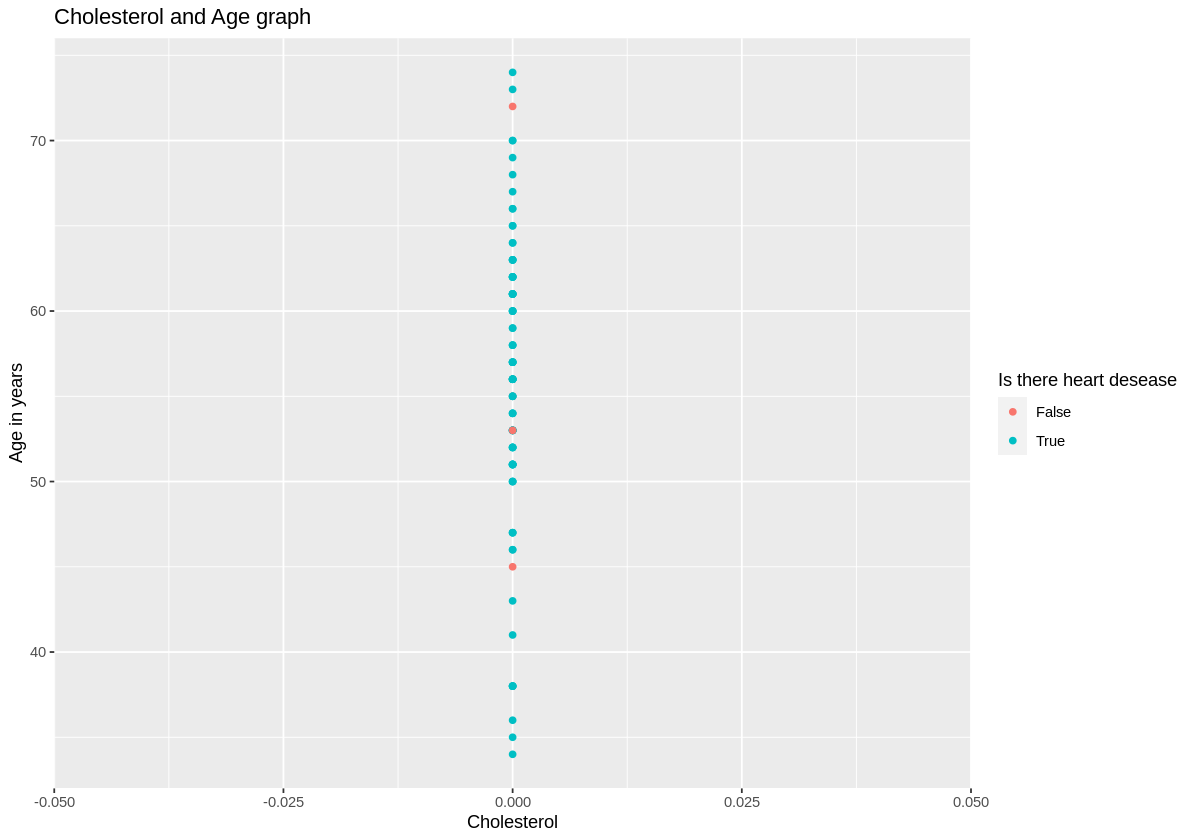

Warning message:
“Removed 1 rows containing missing values (geom_point).”


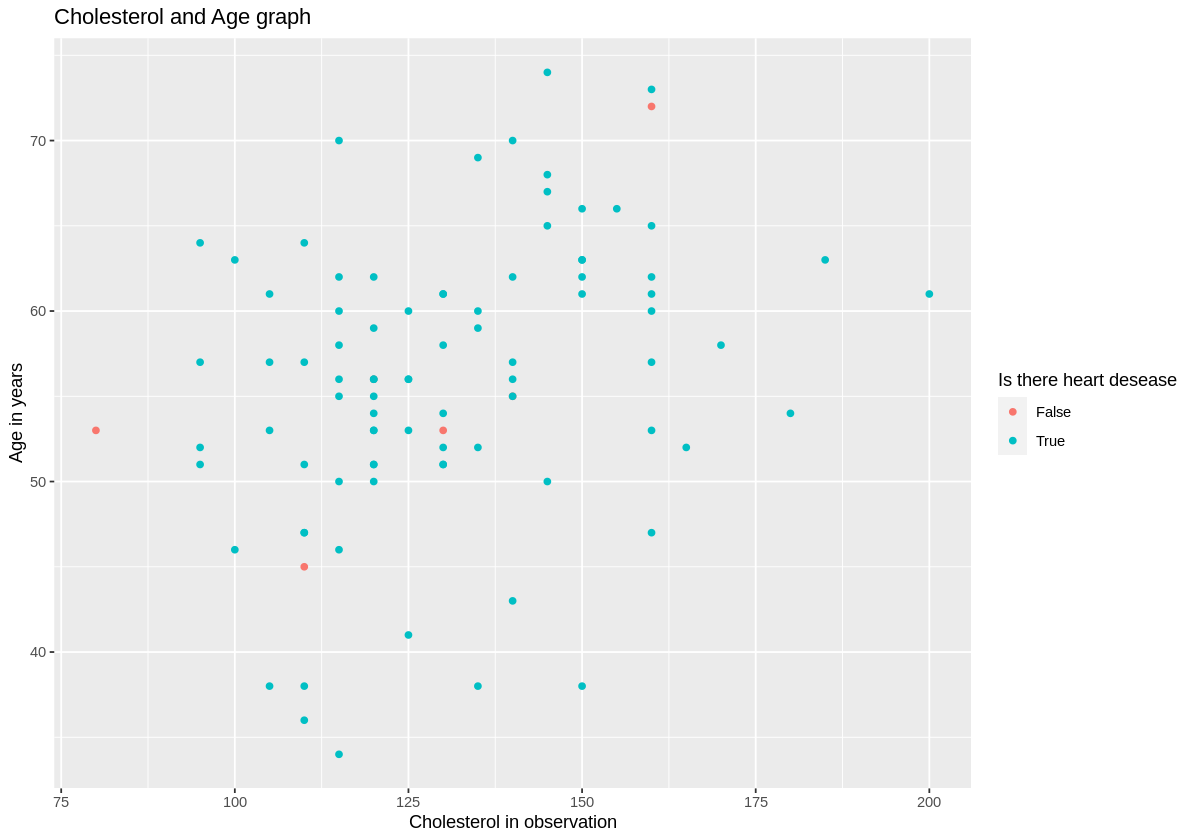

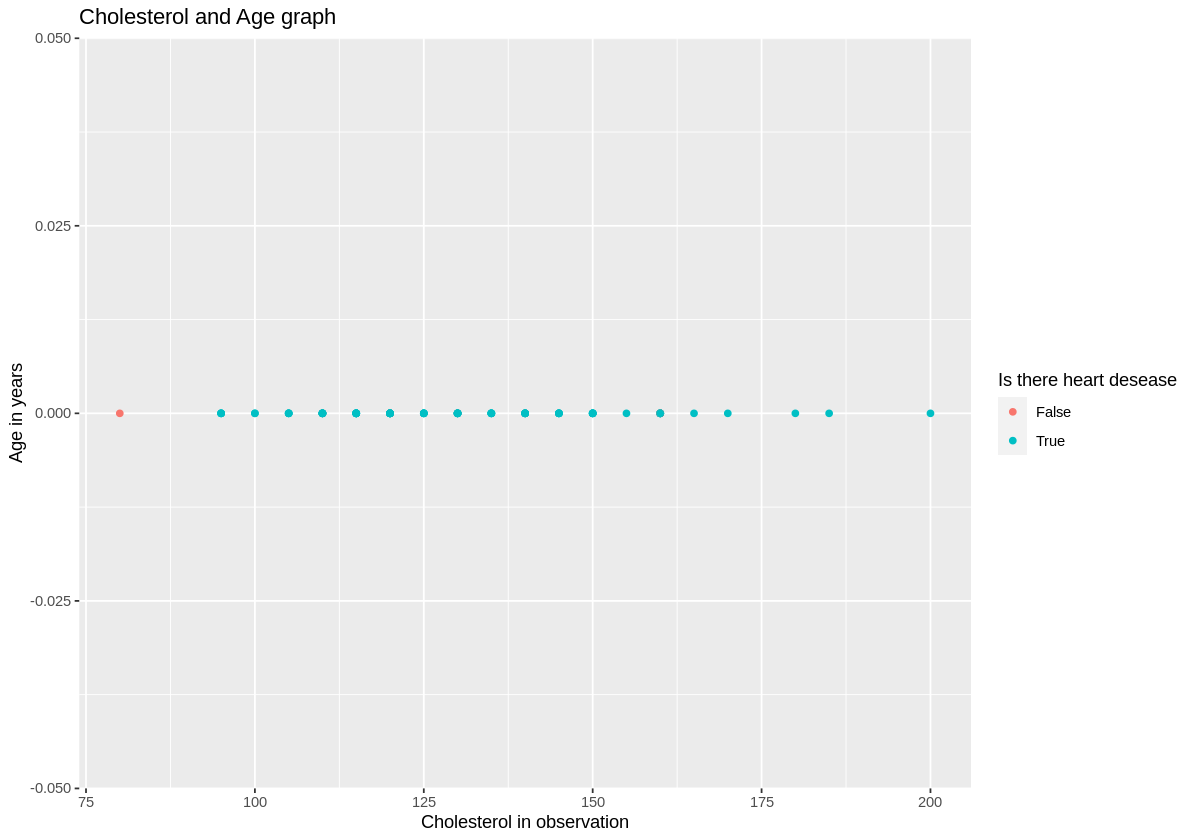

In [46]:
options(repr.plot.width = 10, repr.plot.height = 7) 




age_chol_plot <- heart_train |>
ggplot(aes(x = chol, y = age)) +
       geom_point(aes(color = heart_disease)) +
labs (x = "Cholesterol", y = "Age in years", color = "Is there heart desease", title = "Cholesterol and Age graph")

age_chol_plot


age_trestbps_plot <- heart_train |>
ggplot(aes(x = trestbps, y = age)) +
       geom_point(aes(color = heart_disease)) +
labs (x = "Resting blood preassure", y = "Age in years", color = "Is there heart desease", title = "blood p and Age graph")
age_trestbps_plot

chol_trestbps_plot <- heart_train |>
ggplot(aes(x = trestbps, y = chol)) +
       geom_point(aes(color = heart_disease)) +
labs (x = "Cholesterol in observation", y = "Age in years", color = "Is there heart desease", title = "Cholesterol and Age graph")
chol_trestbps_plot